In [ ]:
from time import time

# Data Cleaning/Preprocessing

In [ ]:
train['Tweet'] = train.apply(clean_mul, axis=1)
val['Tweet'] = val.apply(clean_mul, axis=1)
test['Tweet'] = test.apply(clean_mul, axis=1)

# Text Encoding using Multingual Universal Sentence Encoder

In [ ]:
X_train,y_train,X_val,y_val,X_test,y_test = MUSE (train,val,test)

100%|██████████| 2774/2774 [00:51<00:00, 54.27it/s]


# Hyperparameter Tuning using GridSearch

In [ ]:
# grid serach for hyperparamter tuning - ignore this part if parameter tuning is not required
#param_grid = {'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001]}
#grid = GridSearchCV(SVC(random_state=1,kernel='rbf',max_iter=1000),param_grid,refit=True,verbose=2, cv=5)
#grid.fit(X_train,y_train)

#print(grid.best_estimator_)

# Training and Validation

Evaluation for: SVC Classifier with Multilingual Encoding : Validation
              precision    recall  f1-score   support

     AGAINST      0.645     0.694     0.668       901
       FAVOR      0.782     0.775     0.779      1327
     NEUTRAL      0.692     0.619     0.653       540

    accuracy                          0.718      2768
   macro avg      0.706     0.696     0.700      2768
weighted avg      0.720     0.718     0.718      2768

Evaluation for: SVC Classifier with Multilingual Encoding : Test
              precision    recall  f1-score   support

     AGAINST      0.632     0.691     0.660       903
       FAVOR      0.769     0.750     0.759      1329
     NEUTRAL      0.685     0.618     0.650       542

    accuracy                          0.705      2774
   macro avg      0.695     0.686     0.690      2774
weighted avg      0.708     0.705     0.706      2774



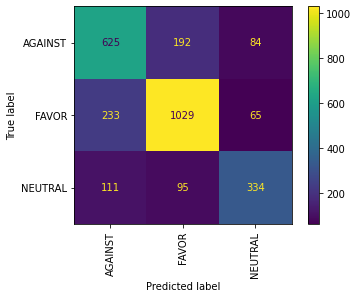

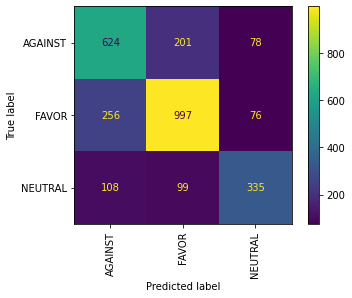

In [ ]:
def svc_param_selection(X, y, nfolds):
    Cs = [input_C]
    gammas = [input_gamma]
    kernel='rbf'
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel=kernel,random_state=1,max_iter=1000), param_grid, cv=nfolds, n_jobs=8)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search

model = svc_param_selection(X_train,y_train, 5)
svc_predicted_val = model.predict(X_val)
evaluation_summary("SVC Classifier with Multilingual Encoding : Validation", y_val, svc_predicted_val,  dataset['labels'])
ConfusionMatrixDisplay.from_predictions(y_val,svc_predicted_val,xticks_rotation='vertical')

# Prediction on Test Set

In [ ]:
svc_predicted_test = model.predict(X_test)
evaluation_summary("SVC Classifier with Multilingual Encoding : Test", y_test, svc_predicted_test,  dataset['labels'])
ConfusionMatrixDisplay.from_predictions(y_test,svc_predicted_test,xticks_rotation='vertical')

In [ ]:
f1score(y_test, svc_predicted_test)

Micro Average Precision :  0.7051189617880317
Micro Average Recall :  0.7051189617880317
Micro Average F1-Score :  0.7051189617880317
............................
Macro Average Precision :  0.6951158383571525
Macro Average Recall :  0.6864330641686535
Macro Average F1-Score :  0.6897175200240867
